In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('players_20.csv')

In [2]:
#Check the shape of the data frame
df.shape


(18278, 104)

In [3]:
#Extract the top100 players based on their market value
df_top100 = df.sort_values('value_eur',ascending=False)[:100]
df_top100.head()            

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
10,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,...,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
#df_pos = df_top100['player_positions'].copy()
#df_pos.unique()
#df_pos.map({'LW':'Defender', 'CAM', 'RW':'Defender', 'CF':'Striker', 'ST', 'ST, RW':'Striker/Mifielder', 
#            'CAM, CM':'Striker/Mifielder', 'LW, CF', 'ST':'Striker',
#           'RW, ST', 'CB':'Defender', 'GK':'Goalkeeper', 'CAM, RW', 'RW, LW':'Defender', 'CM, CDM':'Mifielder', 
#            'CF, ST, LW',
#           'CDM, CM', 'RW, CAM, CM', 'LW, LM', 'LW', 'CF, LM', 'ST, LW',
#           'ST, LM', 'CM', 'CB, LB', 'CAM, LM, ST', 'CDM', 'CF, LW, ST',
#           'CF, ST, CAM', 'CB, CDM', 'CAM, CM, LW', 'CM, CAM', 'CM, CAM, CDM',
#           'CM, LM, RM', 'RB, CM, CDM', 'LW, CM', 'CAM, RM', 'CF, ST',
#           'RM, LM', 'LB', 'CAM, RM, RW', 'CAM, CM, RM', 'RM, LM, CM',
#           'CF, LW, CAM', 'CAM, LM, RM', 'LM, RM, LW', 'RM, LM, LW', 'CAM',
#           'RB', 'LB, CB', 'CAM, CM, CF', 'RW, LW, ST', 'LM'
#                })

In [5]:
#Make a new df with the numerical which consist players personal data and skill rating. Remove the sofifa_id column
df_top100_new = df_top100[df_top100.describe().columns]
df_top100_new.drop(columns=['sofifa_id'],inplace=True)
df_top100_new.head()

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
10,20,178,73,89,95,93500000,155000,3,4,5,...,70,84,34,34,32,13,5,7,11,6
5,28,181,70,91,91,90000000,370000,4,5,4,...,79,91,68,58,51,15,13,5,10,13
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


In [6]:
#Check for null values
df_top100_new.isnull().any()

age                           False
height_cm                     False
weight_kg                     False
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
international_reputation      False
weak_foot                     False
skill_moves                   False
release_clause_eur             True
team_jersey_number            False
contract_valid_until          False
nation_jersey_number           True
pace                           True
shooting                       True
passing                        True
dribbling                      True
defending                      True
physic                         True
gk_diving                      True
gk_handling                    True
gk_kicking                     True
gk_reflexes                    True
gk_speed                       True
gk_positioning                 True
attacking_crossing            False
attacking_finishing         

In [7]:
#The columns that consist of null values are probably due to some positions do not use that certain skillset. 
#Columns starting with "gk_" skillset for goalkeepers
#Let's verify it!



print('Skills: Passing, Position:',format(df_top100[df_top100['passing'].isnull()]['player_positions'].unique()))
print('Skills: shooting, Position:',format(df_top100[df_top100['shooting'].isnull()]['player_positions'].unique()))
print('Skills: dribbling, Position:',format(df_top100[df_top100['dribbling'].isnull()]['player_positions'].unique()))
print('Skills: pace, Position:',format(df_top100[df_top100['pace'].isnull()]['player_positions'].unique()))
print('Skills: defending, Position:',format(df_top100[df_top100['defending'].isnull()]['player_positions'].unique()))
print('Skills: physic, Position:',format(df_top100[df_top100['physic'].isnull()]['player_positions'].unique()))   


Skills: Passing, Position: ['GK']
Skills: shooting, Position: ['GK']
Skills: dribbling, Position: ['GK']
Skills: pace, Position: ['GK']
Skills: defending, Position: ['GK']
Skills: physic, Position: ['GK']


In [8]:
#Set the null values to 0 for the skills which does not start with "gk_" 
#and set the other columns with null values with the mean values for respetively column

#df_top100_new['passing']=df_top100_new['passing'].fillna(0)
#df_top100_new['shooting']=df_top100_new['shooting'].fillna(0)
#df_top100_new['dribbling']=df_top100_new['dribbling'].fillna(0)
#df_top100_new['pace']=df_top100_new['pace'].fillna(0)
#df_top100_new['defending']=df_top100_new['defending'].fillna(0)
#df_top100_new['physic']=df_top100_new['physic'].fillna(0)
#df_top100_new['gk_diving']=df_top100_new['gk_diving'].fillna(df_top100_new['gk_diving'].mean())
#df_top100_new['gk_handling']=df_top100_new['gk_handling'].fillna(df_top100_new['gk_handling'].mean())
#df_top100_new['gk_kicking']=df_top100_new['gk_kicking'].fillna(df_top100_new['gk_kicking'].mean())
#df_top100_new['gk_reflexes']=df_top100_new['gk_reflexes'].fillna(df_top100_new['gk_reflexes'].mean())
#df_top100_new['gk_speed']=df_top100_new['gk_speed'].fillna(df_top100_new['gk_speed'].mean())
#df_top100_new['gk_positioning']=df_top100_new['gk_positioning'].fillna(df_top100_new['gk_positioning'].mean())
df_top100_new=df_top100_new.fillna(0)
df_top100_new.isnull().any()

age                           False
height_cm                     False
weight_kg                     False
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
international_reputation      False
weak_foot                     False
skill_moves                   False
release_clause_eur            False
team_jersey_number            False
contract_valid_until          False
nation_jersey_number          False
pace                          False
shooting                      False
passing                       False
dribbling                     False
defending                     False
physic                        False
gk_diving                     False
gk_handling                   False
gk_kicking                    False
gk_reflexes                   False
gk_speed                      False
gk_positioning                False
attacking_crossing            False
attacking_finishing         

In [9]:
#Columns "release_clause_eur" and "nation_jersey_number" will be removed. 
df_top100_new.drop(columns=['release_clause_eur','nation_jersey_number'], inplace=True)
df_top100_new.isnull().any()

age                           False
height_cm                     False
weight_kg                     False
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
international_reputation      False
weak_foot                     False
skill_moves                   False
team_jersey_number            False
contract_valid_until          False
pace                          False
shooting                      False
passing                       False
dribbling                     False
defending                     False
physic                        False
gk_diving                     False
gk_handling                   False
gk_kicking                    False
gk_reflexes                   False
gk_speed                      False
gk_positioning                False
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing     

In [10]:
#Standardise the valaues
standard = StandardScaler()
df_standard = standard.fit_transform(df_top100_new)
df_standard

array([[ 0.16338312, -0.94374525, -1.18340684, ..., -0.06745645,
        -0.07010108, -0.26736913],
       [ 1.7343747 , -1.62960663, -0.67386676, ..., -0.06745645,
        -0.1177889 , -0.40566351],
       [-2.03600508, -0.53222843, -0.54648174, ..., -0.47940427,
        -0.26085233, -0.49785976],
       ...,
       [-0.46501351,  0.01646067, -0.41909672, ..., -0.06745645,
        -0.1177889 , -0.12907475],
       [-0.15081519, -0.94374525, -0.9286368 , ..., -0.37641731,
        -0.5469792 , -0.45176163],
       [-1.72180677,  0.01646067,  0.98213851, ..., -0.22193688,
        -0.35622796, -0.17517288]])

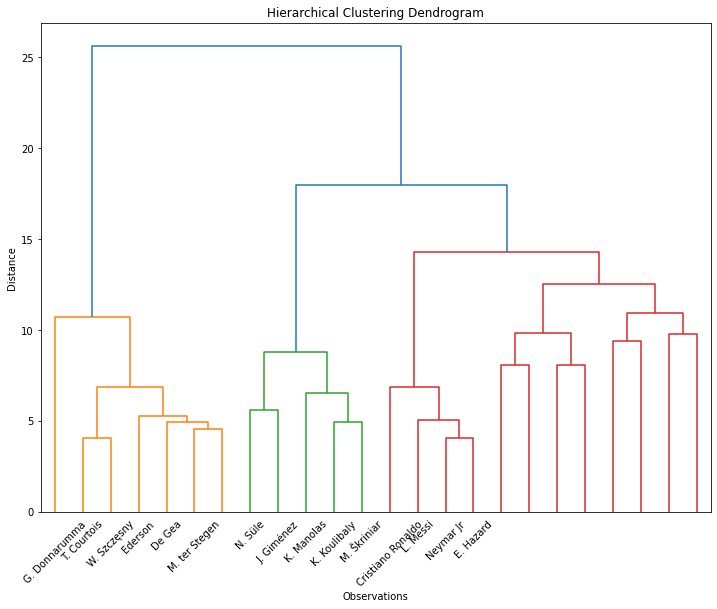

In [11]:
#hierarchical clustering
names = df_top100['short_name'].to_list()
hier_clust = linkage(df_standard, method = 'complete')

plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           labels= names)
           #no_labels = True)
plt.xticks(rotation=45) 
plt.show()


In [160]:
# Perform K-means clustering. Assuming 1 to 10 clusters, so our for loop runs 10 iterations.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    random_state = 7)
    kmeans.fit(df_standard)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Kmean clustering')

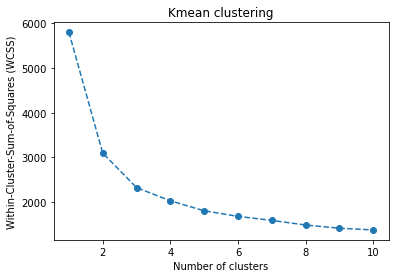

In [159]:
plt.plot(range(1,11),wcss,'o--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Kmean clustering')

In [14]:
#The elbow method shows three clusters should be enough
kmeans =KMeans(n_clusters = 4,
               init = 'k-means++',
               random_state = 7)
kmeans.fit(df_standard)

KMeans(n_clusters=4, random_state=7)

In [15]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 3, 1, 2, 2, 3, 0, 3, 0, 3,
       3, 3, 1, 3, 0, 2, 1, 3, 2, 0, 1, 2, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 3, 0, 2, 0, 0, 0, 0, 2, 3, 0, 2, 2, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0])

In [16]:
df_kmeans = df_top100_new.copy()
df_kmeans['kmeans'] = kmeans.labels_
df_kmeans_analysis = df_kmeans.groupby('kmeans').mean() 
df_kmeans_analysis.iloc[:,30:60]

,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
kmeans,,,,,,,,,,,,,,,,,,,,,
0,80.666667,70.000000,77.458333,86.125000,78.604167,76.875000,81.125000,83.541667,79.125000,79.729167,...,67.958333,82.833333,55.479167,57.208333,51.729167,9.437500,10.041667,10.687500,9.875000,10.104167
1,16.625000,16.375000,43.375000,30.125000,50.125000,53.875000,55.875000,85.000000,44.250000,60.625000,...,21.750000,67.500000,22.625000,15.625000,13.625000,87.000000,84.750000,80.500000,86.250000,89.125000
2,54.090909,48.272727,75.545455,76.136364,66.136364,71.727273,62.000000,84.681818,57.681818,67.727273,...,51.363636,83.590909,87.318182,87.000000,84.863636,11.181818,9.818182,10.636364,10.818182,10.818182
3,83.500000,78.227273,76.500000,89.227273,83.454545,82.181818,84.681818,89.727273,80.272727,85.363636,...,81.136364,88.272727,45.000000,41.863636,36.363636,11.272727,10.545455,10.909091,11.136364,11.090909


In [17]:
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,kmeans,Cluster
2,27,175,68,92,92,105500000,290000,5,5,5,...,27,26,29,9,9,15,15,11,3,3
0,32,170,72,94,94,95500000,565000,5,4,4,...,33,37,26,6,11,15,14,8,3,3
10,20,178,73,89,95,93500000,155000,3,4,5,...,34,34,32,13,5,7,11,6,3,3
5,28,181,70,91,91,90000000,370000,4,5,4,...,68,58,51,15,13,5,10,13,3,3
4,28,175,74,91,91,90000000,470000,4,4,4,...,34,27,22,11,12,6,8,8,3,3


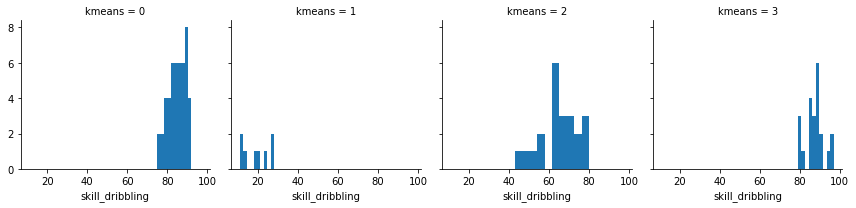

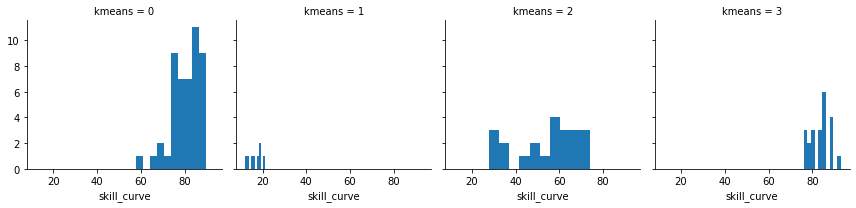

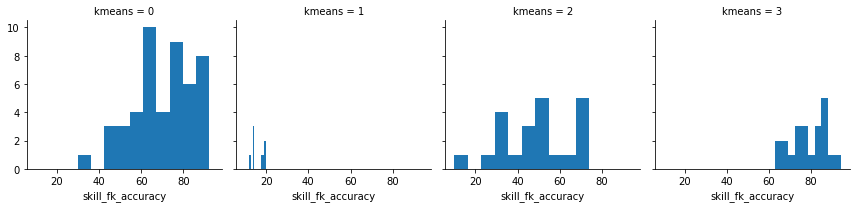

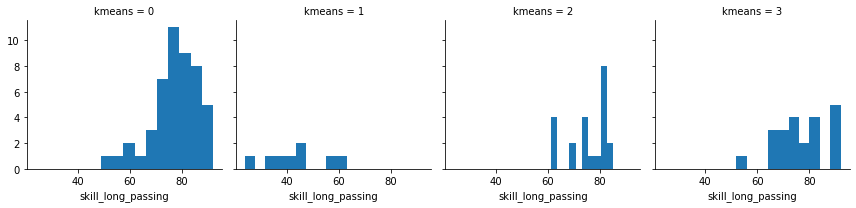

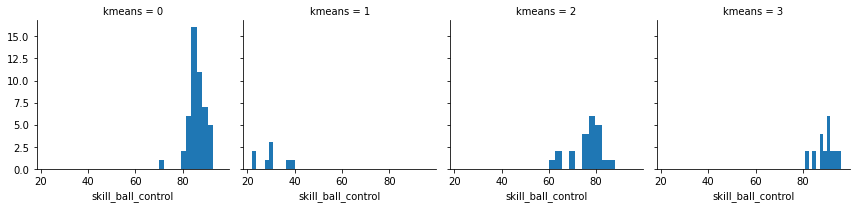

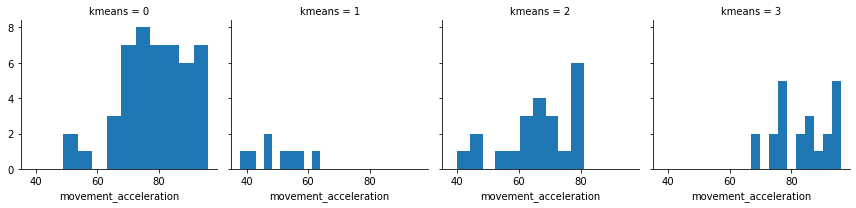

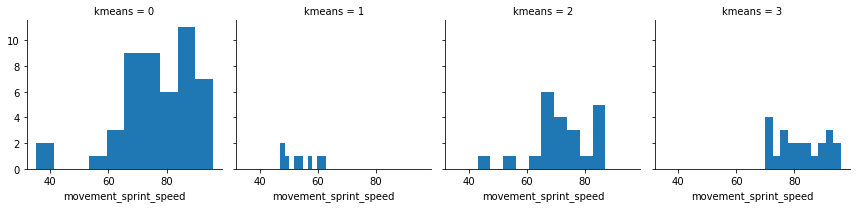

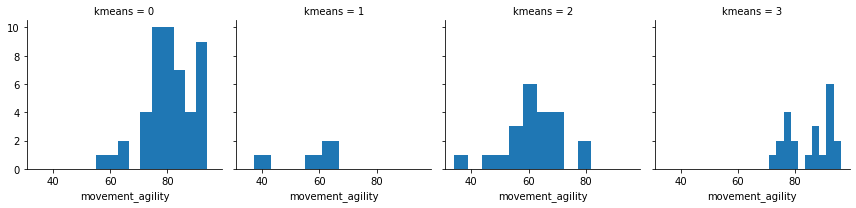

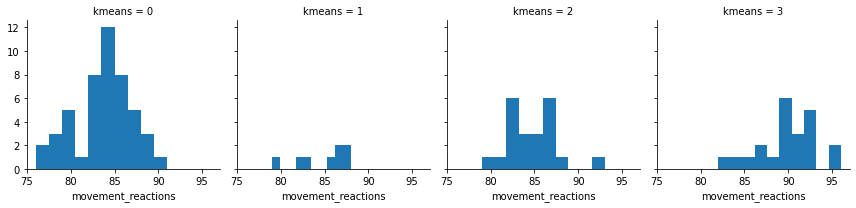

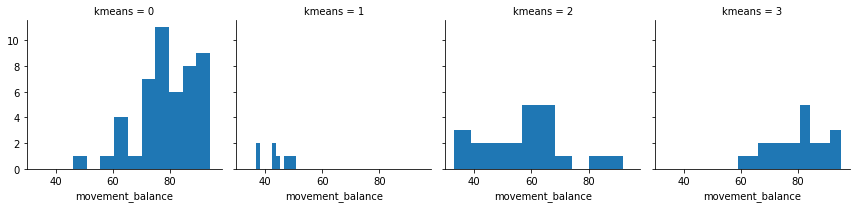

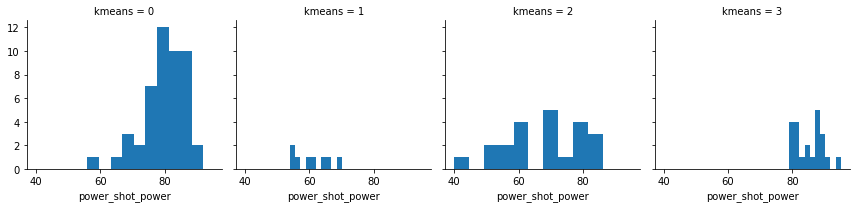

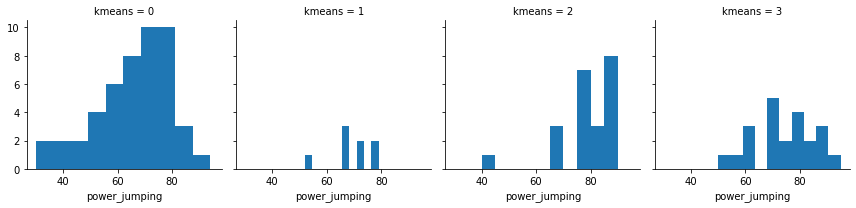

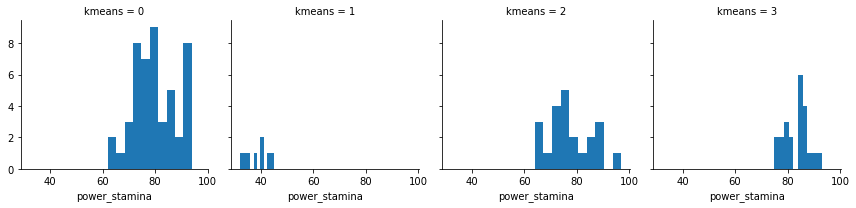

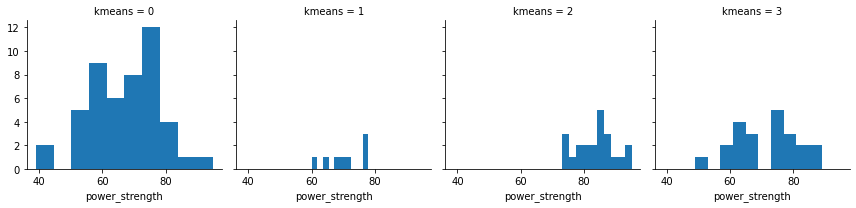

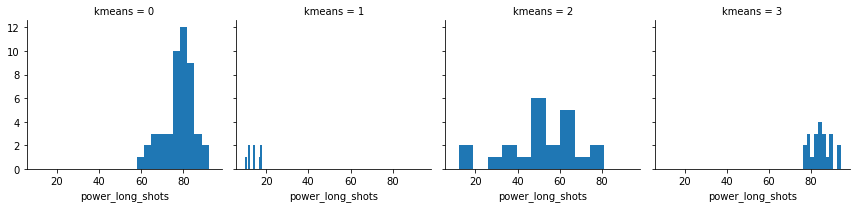

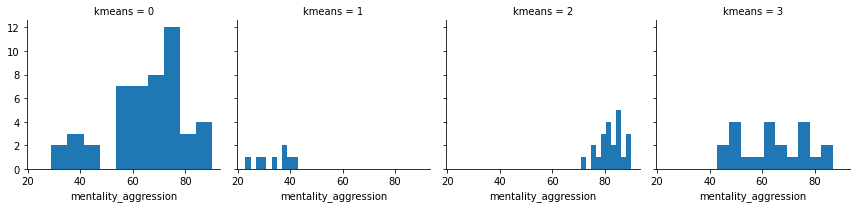

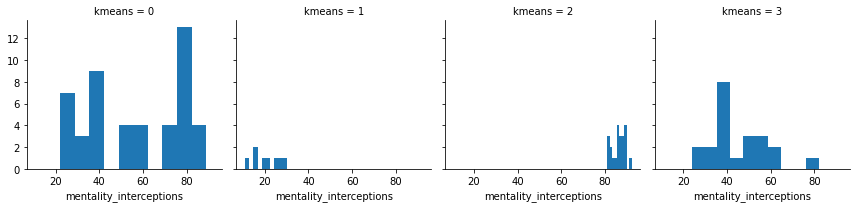

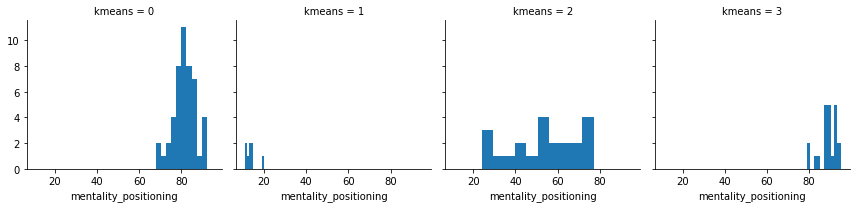

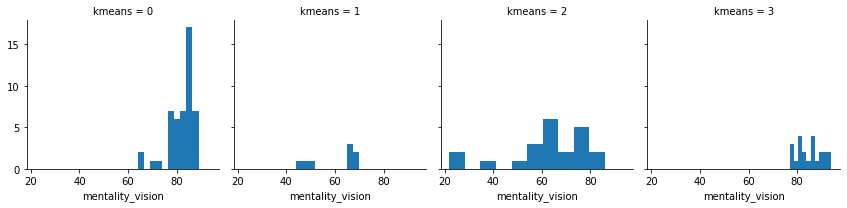

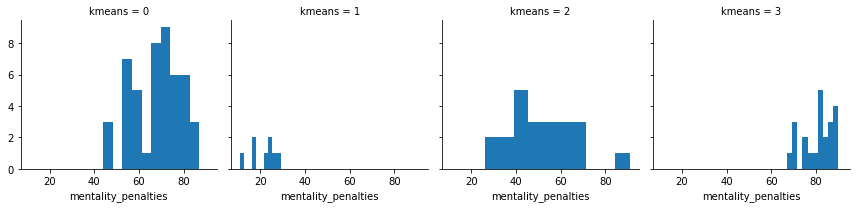

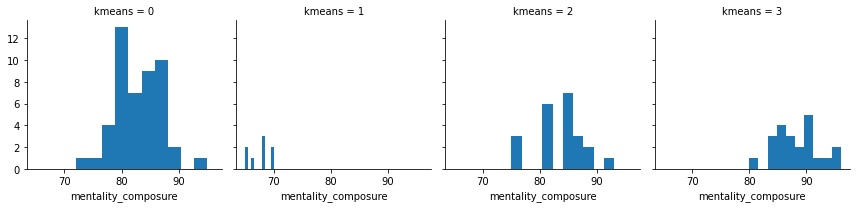

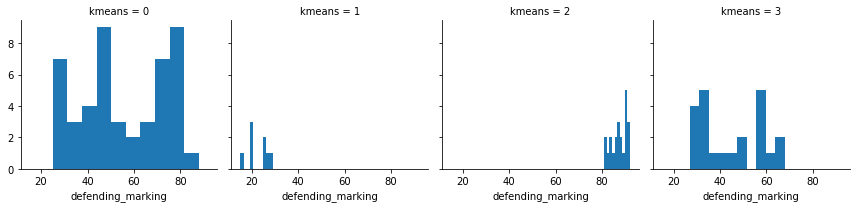

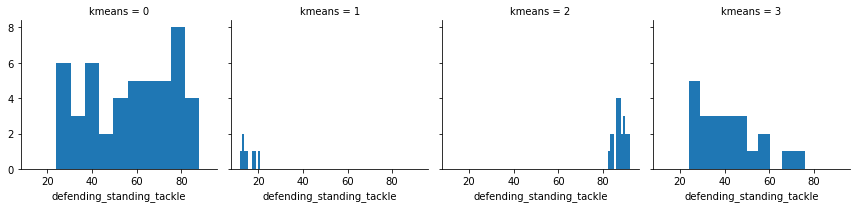

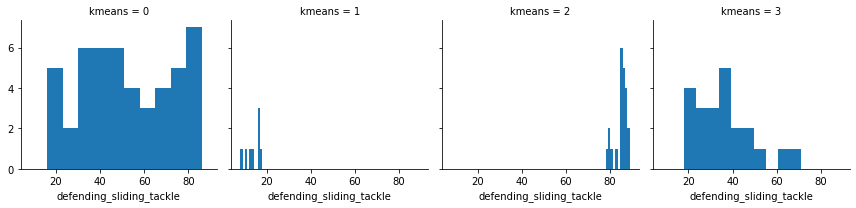

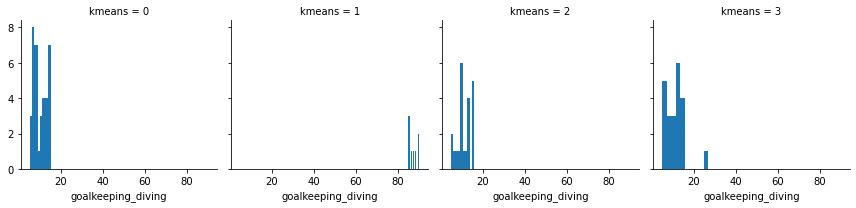

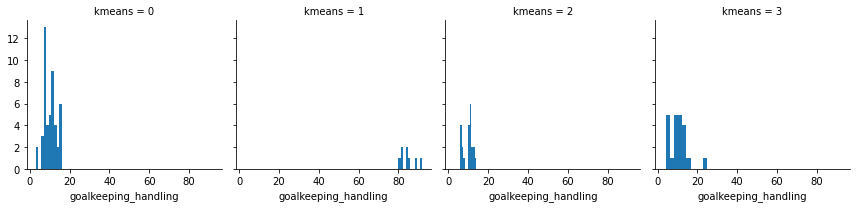

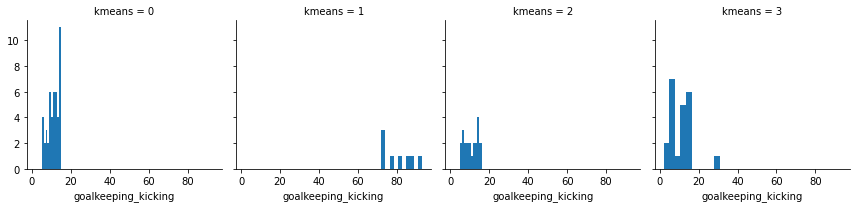

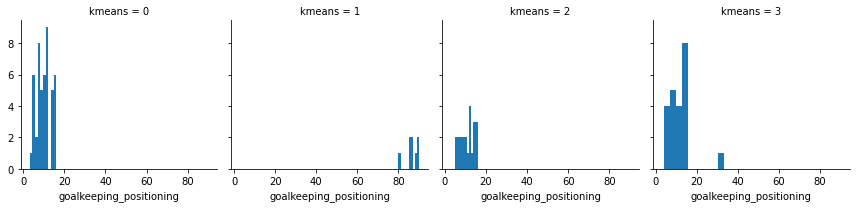

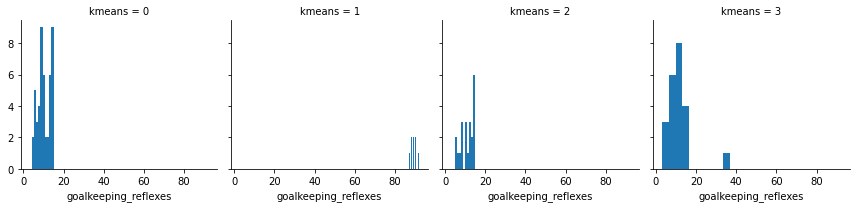

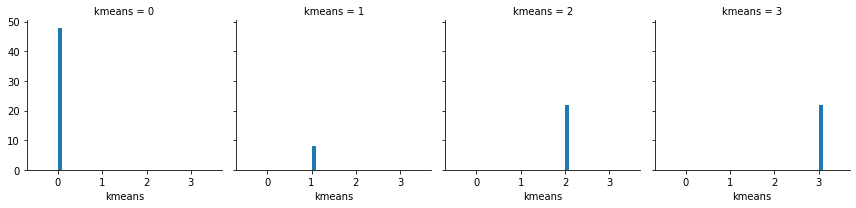

In [18]:
#Visualise the data frame for each cluster in a histogram 
pd.options.display.max_rows = 1500
df_kmeans_i = df_kmeans.reset_index()
for i in df_kmeans_i.iloc[:,30:60]:
    grid= sns.FacetGrid(df_kmeans_i, col='kmeans')
    grid.map(plt.hist, i)
    plt.show()

In [19]:
# kmean 0 = striker , kmean 1  = Goalie, kmean 2 = defender , kmean 3 = midfield 
# 3 movment_acceleration is higher compared to 0
# more power_shot_power in 0 than 3

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


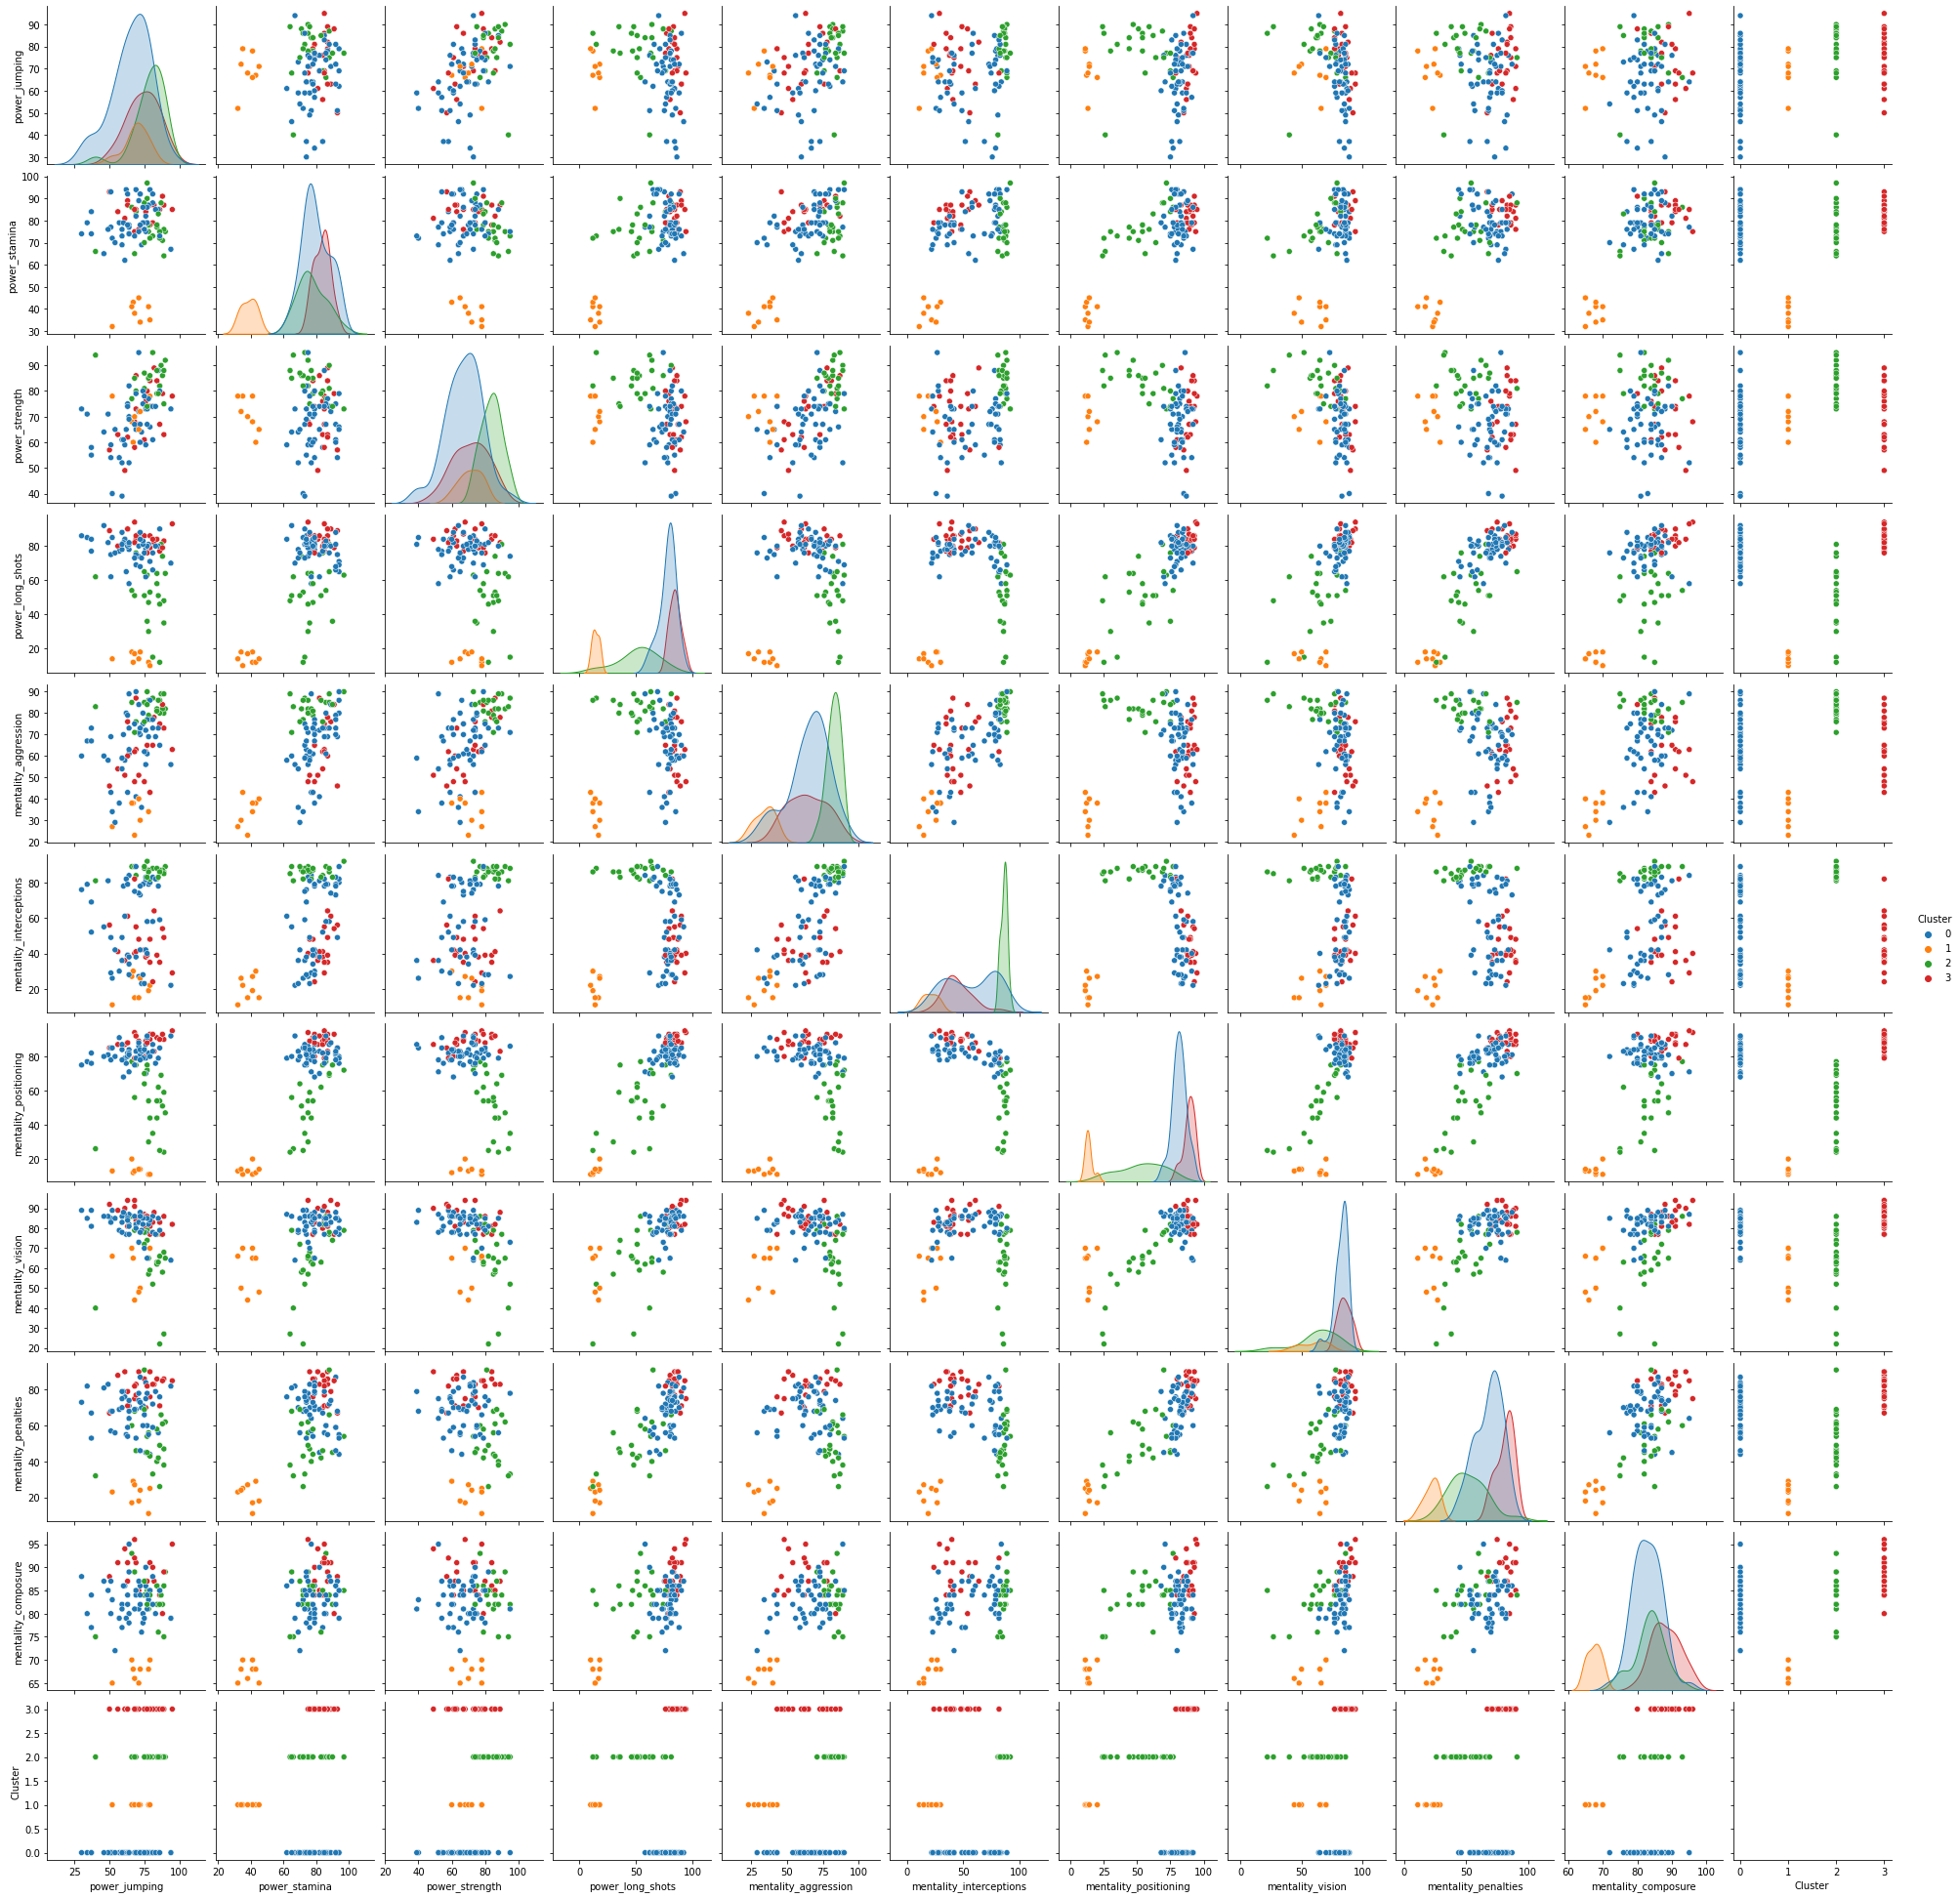

In [20]:
#sns.pairplot(df_kmeans.iloc[:10,44:50])
sns.pairplot(df_kmeans,vars=['power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                               'mentality_aggression', 'mentality_interceptions',
                               'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                               'mentality_composure','Cluster'],hue='Cluster',palette="tab10")
plt.show()

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


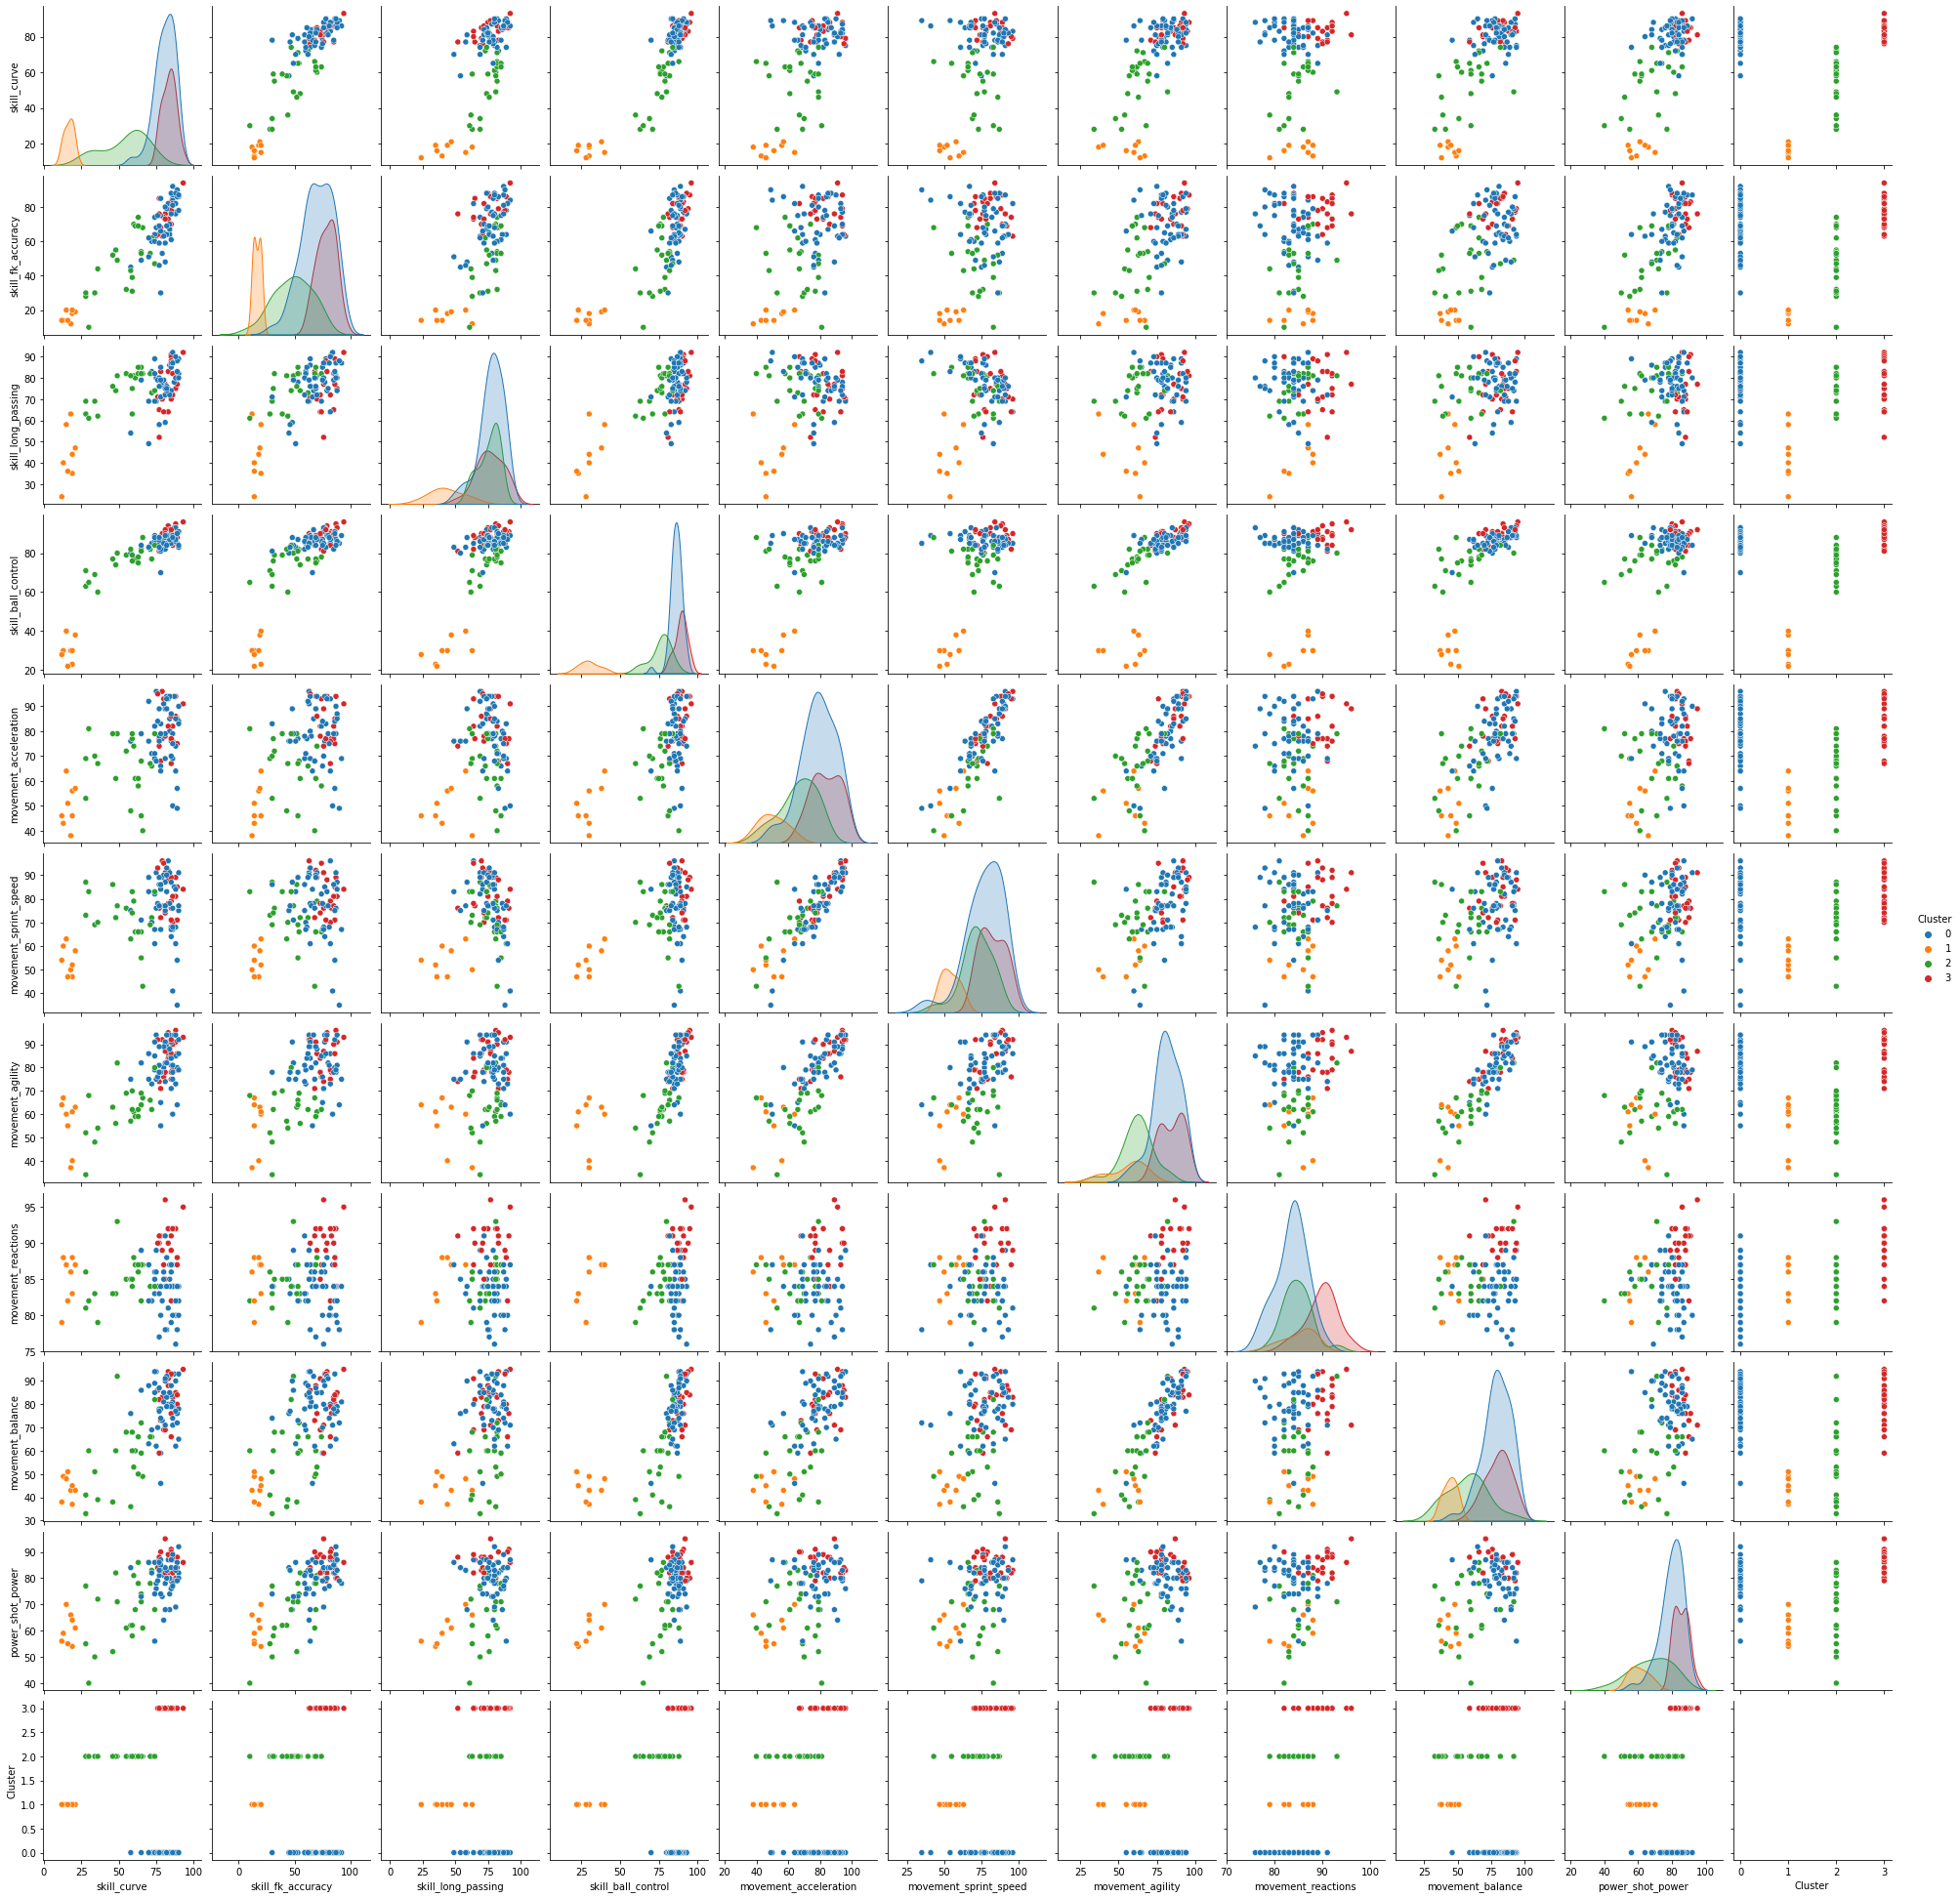

In [21]:
sns.pairplot(df_kmeans,vars=['skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                           'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                           'movement_agility', 'movement_reactions', 'movement_balance',
                           'power_shot_power','Cluster'],hue='Cluster',palette="tab10")
plt.show()

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


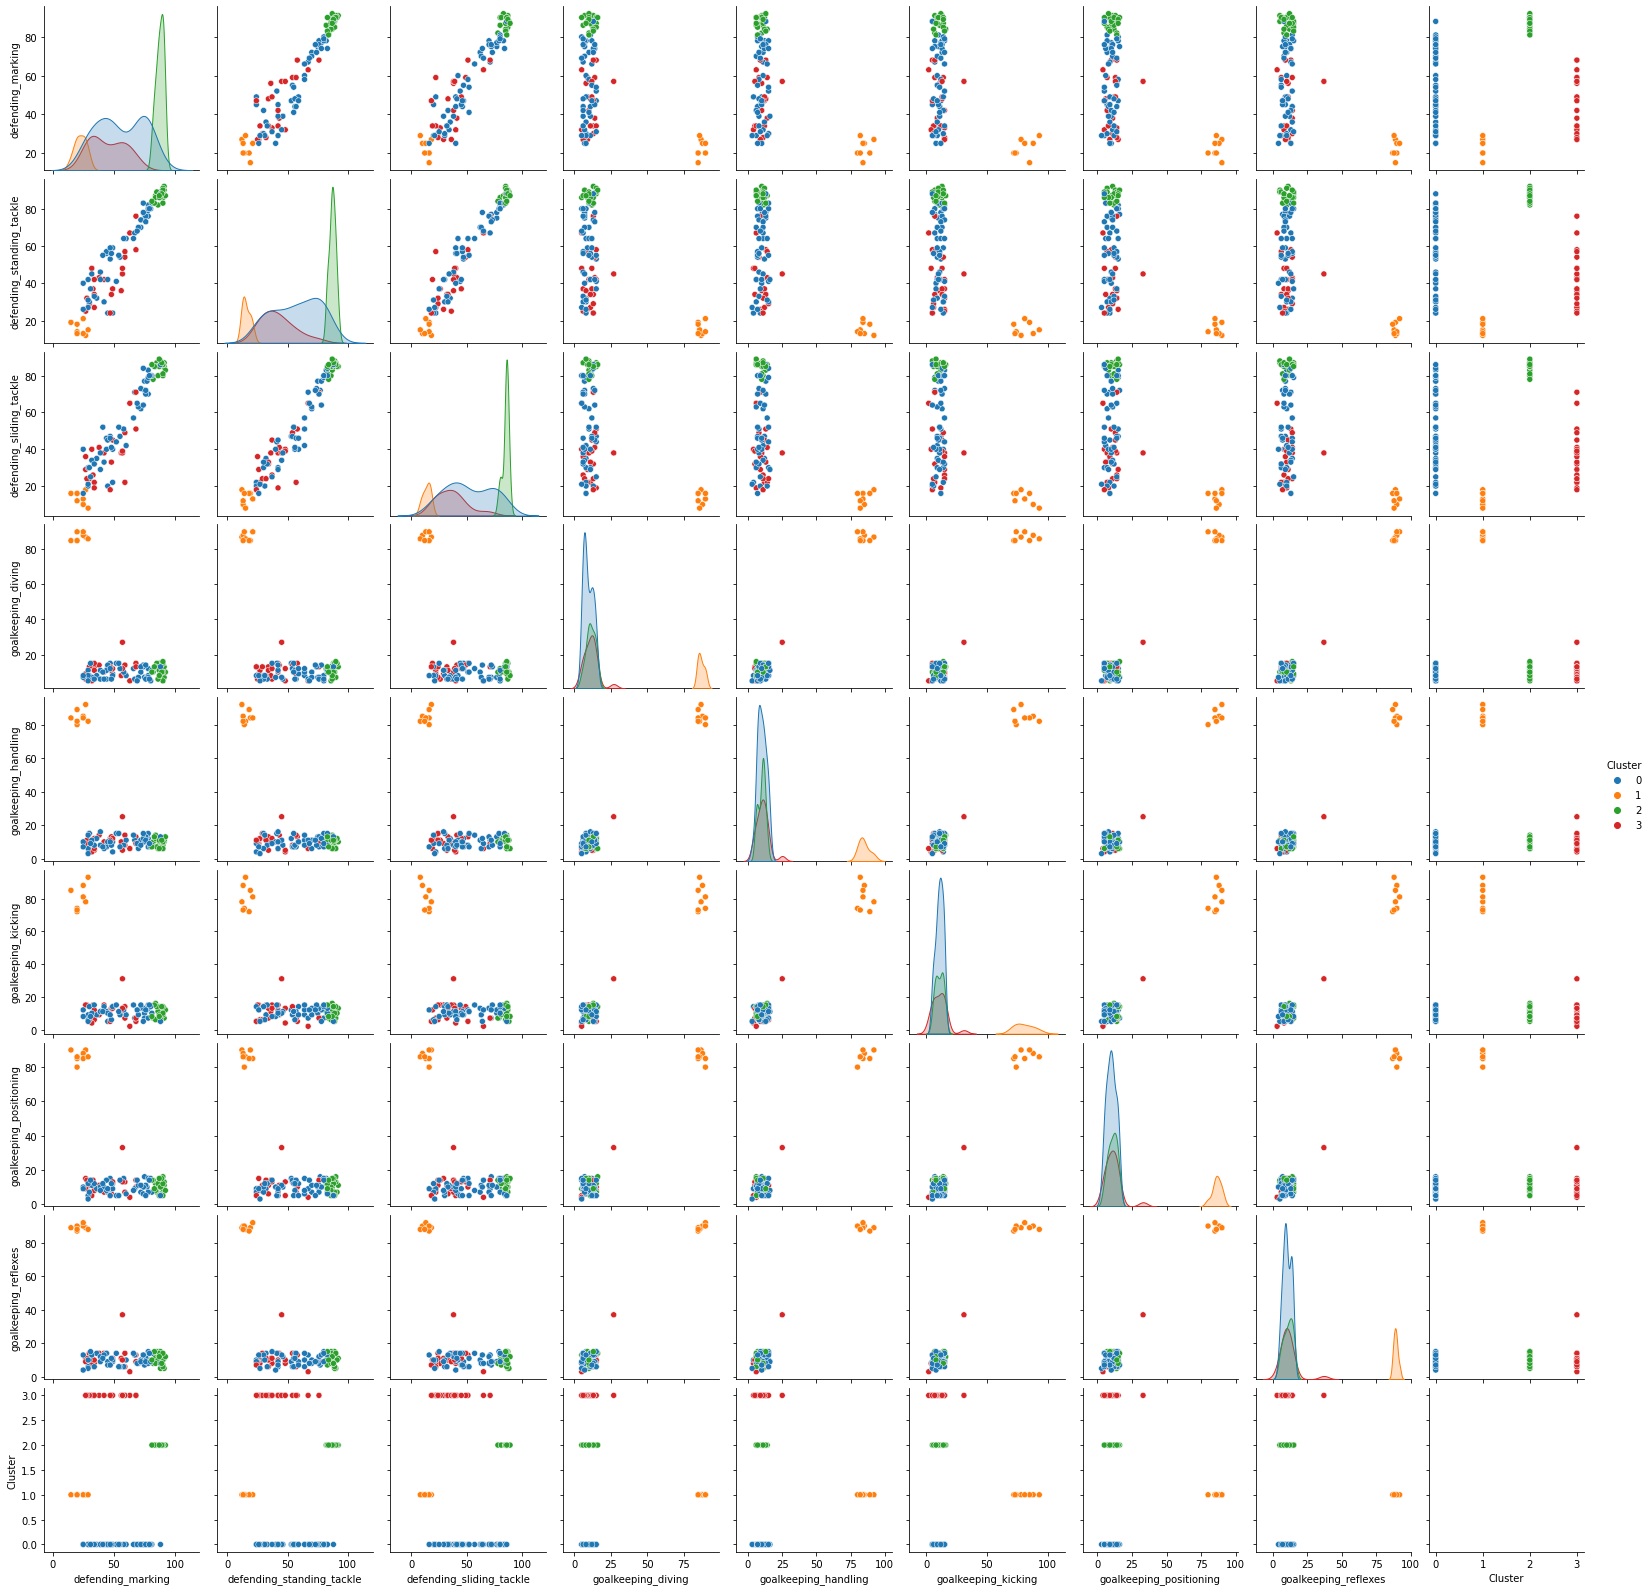

In [22]:

sns.pairplot(df_kmeans,vars=['defending_marking', 'defending_standing_tackle',
                               'defending_sliding_tackle', 'goalkeeping_diving',
                               'goalkeeping_handling', 'goalkeeping_kicking',
                               'goalkeeping_positioning', 'goalkeeping_reflexes', 'Cluster'],hue='Cluster',palette="tab10")
plt.show()

In [23]:
len(df_kmeans)
df_kmeans.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_c

In [41]:
columns =   ['weak_foot', 'skill_moves',
           'shooting','passing', 'dribbling', 'defending', 'physic', 'gk_diving',
           'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
           'gk_positioning', 'attacking_crossing', 'attacking_finishing',
           'attacking_heading_accuracy', 'attacking_short_passing',
           'attacking_volleys', 'skill_dribbling', 'skill_curve',
           'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
           'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
           'movement_reactions', 'movement_balance', 'power_shot_power',
           'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
           'mentality_aggression', 'mentality_interceptions',
           'mentality_positioning', 'mentality_vision', 'mentality_penalties',
           'mentality_composure', 'defending_marking', 'defending_standing_tackle',
           'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking',
           'goalkeeping_positioning', 'goalkeeping_reflexes']
x= df_kmeans[columns]
y = df_kmeans['Cluster']


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
 
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=109) # 70% training and 30% test

model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=1000)
model.fit(X_train,y_train)

print('Accuracy: ', model.score(X_test,y_test))

y_pred = model.predict(X_test)

c_matrix= metrics.confusion_matrix(y_test,y_pred)
print(c_matrix)

Accuracy:  0.9
[[17  0  0  0]
 [ 0  2  0  0]
 [ 1  0  4  0]
 [ 2  0  0  4]]


In [91]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=6, solver='newton-cg', max_iter=1000,random_state=9)#newton-cg,multi_class='ovr'
model.fit(X_train,y_train)

print('Accuracy: ', model.score(X_test,y_test))
y_pred = model.predict(X_test)

c_matrix= metrics.confusion_matrix(y_test,y_pred)
print(c_matrix)

Accuracy:  0.9666666666666667
[[17  0  0  0]
 [ 0  2  0  0]
 [ 1  0  4  0]
 [ 0  0  0  6]]


In [26]:
df1 = df[100:150]
df1 = df1[columns]
df1.fillna(0, inplace=True)


In [89]:
prediction = model.predict(df1)
s_prediction = pd.Series(prediction)


In [90]:
name = df[100:150]['long_name'].reset_index(drop=True)
df_pred = pd.DataFrame({"Name":name ,"Prediction":s_prediction})
df_pred
pos = ["Anfallare" ,"Försvarare", "Mittfältare", "Försvarare", "Anfallare", "Mittfältare" ,"Mittfältare", "Mittfältare", "Mittfältare", "Mittfältare",
"Anfallare", "Fotbollsmålvakt" ,"Försvarare", "Mittfältare" ,"Försvarare", "Mittfältare", "Anfallare" ,"Mittfältare", "Anfallare, Mittfältare",
"Anfallare", "Anfallare, Mittfältare", "Anfallare", "Fotbollsmålvakt","Mittfältare","Försvarare","Fotbollsmålvakt","Försvarare",
"Anfallare","Försvarare", "Mittfältare","Fotbollsmålvakt","Fotbollsmålvakt","Mittfältare","Försvarare","Mittfältare","Mittfältare", "Defensiv mittfältare / mittback",
"Fotbollsmålvakt","Anfallare","Offensiv mittfältare", "Mittfältare","Anfallare", "Mittfältare", "Försvarare" , "Försvarare" ,"Mittfältare/Anfallare","Mittfältare","Mittfältare",
"Försvarare","Offensiv mittfältare"]
s_pos = pd.Series(pos)
s_pos = s_pos.map({'Anfallare': 0,
           "Fotbollsmålvakt":1,
           "Försvarare":2, 
           "Mittfältare":3,
           "Defensiv mittfältare / mittback":2,
           "Mittfältare/Anfallare":0,
           "Offensiv mittfältare":0,
           "Anfallare, Mittfältare":0})
pd.concat([df_pred,s_pos],axis=1)

,Name,Prediction,0
0,Gareth Frank Bale,0,0
1,Marcelo Vieira da Silva Júnior,0,2
2,Axel Witsel,0,3
3,Alex Sandro Lobo Silva,0,2
4,Iago Aspas Juncal,0,0
5,Jorge Resurrección Merodio,0,3
6,James David Rodríguez Rubio,0,3
7,Allan Marques Loureiro,0,3
8,Jadon Sancho,0,3
9,Kai Havertz,0,3


[0.6907051282051282, 0.7291666666666666, 0.7395833333333333, 0.7596153846153846, 0.7604166666666666, 0.7596153846153846, 0.7708333333333334, 0.7804487179487181, 0.8004807692307693, 0.8012820512820513, 0.7900641025641026, 0.7708333333333334, 0.7804487179487181, 0.7804487179487181, 0.7403846153846154, 0.7211538461538461, 0.7107371794871795, 0.6907051282051282, 0.6802884615384616, 0.7003205128205128, 0.7211538461538461, 0.6907051282051282, 0.7107371794871795, 0.6907051282051282, 0.6714743589743589, 0.6698717948717949, 0.6602564102564104, 0.6802884615384616, 0.6706730769230769, 0.6706730769230769]
0.8012820512820513


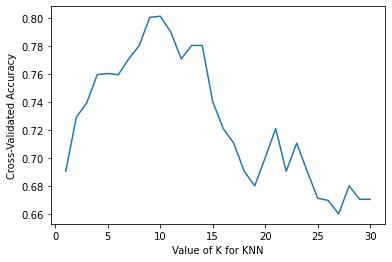

In [147]:
columns =   [
           'weak_foot', 'skill_moves',
           'shooting','passing', 'dribbling', 'defending',  'defending_marking', 'defending_standing_tackle',
           'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking',
           'goalkeeping_positioning', 'goalkeeping_reflexes']
x= df_kmeans[columns]
y = df_kmeans['Cluster']


from sklearn.model_selection import cross_val_score

k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=8, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
knn = KNeighborsClassifier(n_neighbors=10)
print(cross_val_score(knn, x, y, cv=8, scoring='accuracy').mean())

#lr = LogisticRegression(max_iter=1000,solver='newton-cg')
#print(cross_val_score(lr, x, y, cv=8, scoring='accuracy').mean())

In [161]:

 
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=109) # 70% training and 30% test


model = LogisticRegressionCV( solver='newton-cg', max_iter=5000,random_state=90, class_weight="balanced")#newton-cg,multi_class='ovr'
model.fit(X_train,y_train)

print('Accuracy: ', model.score(X_test,y_test))
y_pred = model.predict(X_test)

c_matrix= metrics.confusion_matrix(y_test,y_pred)
print(c_matrix)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
c_matrix= metrics.confusion_matrix(y_test,y_pred)
print(c_matrix)

Accuracy:  0.7333333333333333
[[13  0  1  3]
 [ 0  2  0  0]
 [ 1  0  4  0]
 [ 3  0  0  3]]
0.7333333333333333
[[14  0  0  3]
 [ 0  2  0  0]
 [ 1  0  4  0]
 [ 4  0  0  2]]


In [162]:
df1 = df[100:150]
df1 = df1[columns]
df1.fillna(0, inplace=True)

prediction = model.predict(df1)
s_prediction = pd.Series(prediction)


In [163]:
name = df[100:150]['long_name'].reset_index(drop=True)
df_pred = pd.DataFrame({"Name":name ,"Prediction":s_prediction})
df_pred
pos = ["Anfallare" ,"Försvarare", "Mittfältare", "Försvarare", "Anfallare", "Mittfältare" ,"Mittfältare", "Mittfältare", "Mittfältare", "Mittfältare",
"Anfallare", "Fotbollsmålvakt" ,"Försvarare", "Mittfältare" ,"Försvarare", "Mittfältare", "Anfallare" ,"Mittfältare", "Anfallare, Mittfältare",
"Anfallare", "Anfallare, Mittfältare", "Anfallare", "Fotbollsmålvakt","Mittfältare","Försvarare","Fotbollsmålvakt","Försvarare",
"Anfallare","Försvarare", "Mittfältare","Fotbollsmålvakt","Fotbollsmålvakt","Mittfältare","Försvarare","Mittfältare","Mittfältare", "Defensiv mittfältare / mittback",
"Fotbollsmålvakt","Anfallare","Offensiv mittfältare", "Mittfältare","Anfallare", "Mittfältare", "Försvarare" , "Försvarare" ,"Mittfältare/Anfallare","Mittfältare","Mittfältare",
"Försvarare","Offensiv mittfältare"]
s_pos = pd.Series(pos)
s_pos = s_pos.map({'Anfallare': 0,
           "Fotbollsmålvakt":1,
           "Försvarare":2, 
           "Mittfältare":3,
           "Defensiv mittfältare / mittback":2,
           "Mittfältare/Anfallare":0,
           "Offensiv mittfältare":0,
           "Anfallare, Mittfältare":0})
pd.concat([df_pred,s_pos],axis=1)

,Name,Prediction,0
0,Gareth Frank Bale,0,0
1,Marcelo Vieira da Silva Júnior,0,2
2,Axel Witsel,0,3
3,Alex Sandro Lobo Silva,0,2
4,Iago Aspas Juncal,3,0
5,Jorge Resurrección Merodio,0,3
6,James David Rodríguez Rubio,0,3
7,Allan Marques Loureiro,2,3
8,Jadon Sancho,0,3
9,Kai Havertz,0,3


In [156]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [ ]:
# Fit PCA with our standardized data.
pca.fit(df_standard)

In [ ]:
# The attribute shows how much variance is explained by each of the seven individual components.

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained variances ratio by components')
plt.xlabel('Component')
plt.ylabel('Explained variances ratio')
sum(pca.explained_variance_ratio_)


In [ ]:
#plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
pca1=PCA(n_components=2)
pca1.fit(df_standard)
pca1.explained_variance_ratio_
pca1.components_

In [ ]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (15,9))
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components = 7)

In [ ]:
#Fit_transform the model the our data with the selected number of components. In our case seven.
scores_pca = pca.fit_transform(df_standard)

In [ ]:
pca.components_

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_kmeans_analysis.columns.values
                          )
df_pca_comp.iloc[:,30:60]

In [ ]:
# Perform K-means clustering with PCA. Assuming 1 to 10 clusters, so our for loop runs 10 iterations.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    random_state = 7)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [ ]:
plt.plot(range(1,11),wcss,'o--')

In [ ]:
kmeans_pca = KMeans(n_clusters = 3, 
                    init = 'k-means++', 
                    random_state = 7)
kmeans_pca.fit(scores_pca)

In [ ]:
kmeans_pca.labels_

In [ ]:
df_new = pd.concat([df_top100_new.reset_index(drop=True),pd.DataFrame(scores_pca)],axis = 1)
df_new.columns.values[-7:] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7']
df_new['Principal Component'] = kmeans_pca.labels_
df_new

In [ ]:
df_new1=df_new.groupby('Principal Component').mean()
df_new1['legend'] = df_new1.index
df_new1

In [ ]:
x = df_new['Component 1']
y = df_new['Component 2']
sns.scatterplot(x,y,hue=df_new['Principal Component'],palette='Dark2')

In [ ]:
x = df_new['Component 1']
y = df_new['Component 3']
sns.scatterplot(x,y,hue=df_new['Principal Component'],palette='Dark2')

In [ ]:
x = df_new['Component 1']
y = df_new['Component 4']
sns.scatterplot(x,y,hue=df_new['Principal Component'],palette='Dark2')